Regresion Lineal


Inicio importando las librerias que vamos a usar

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Leemos el archivo y la ubicacion del archivo para la ejecucion de este

df = pd.read_csv(r"C:\Users\LENOVO\Documents\Regresion Lineal\Regresion_Lineal.csv")

print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [18]:
# Muestro información general del dataset: número de entradas, tipos de datos y si hay valores nulos
print(df.info())

# Muestro estadísticas descriptivas de las columnas numéricas: media, mínimo, máximo, etc.
print(df.describe())

# Verifico si hay valores nulos en alguna columna
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000

Hasta este punto, he cargado correctamente el dataset de autos usados y realicé una primera exploración. Verifiqué que no hay valores nulos y observé que las variables numéricas principales son year, selling_price y km_driven. Además, identifiqué que las variables categóricas (fuel, seller_type, transmission, owner) deberán ser transformadas antes de entrenar el modelo. Como siguiente paso, eliminaré la columna name, ya que no aporta valor al análisis de regresión, y aplicaré codificación One-Hot para preparar los datos para el modelo.

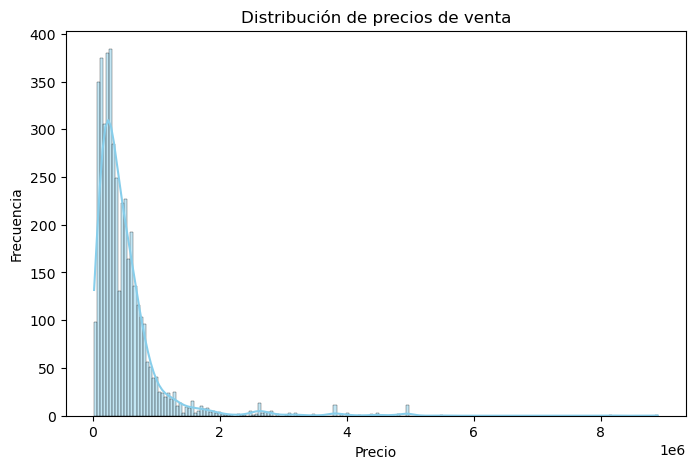

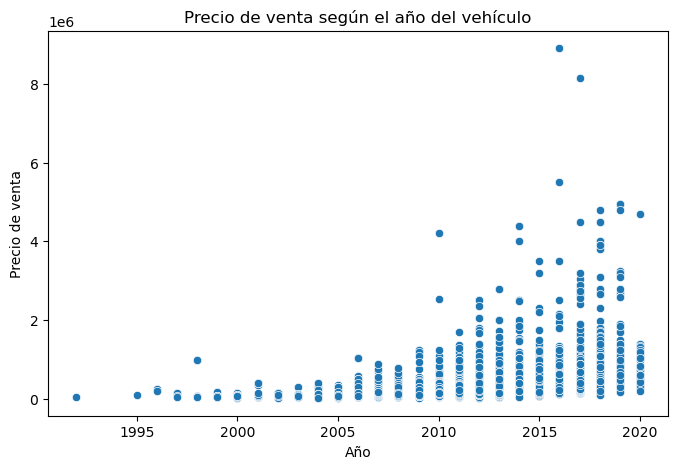

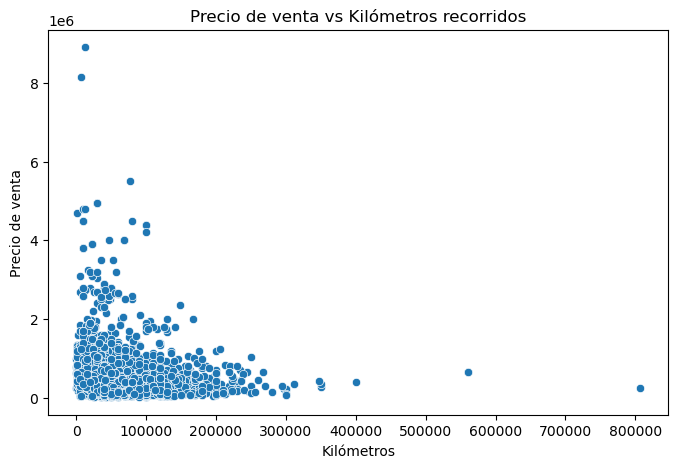

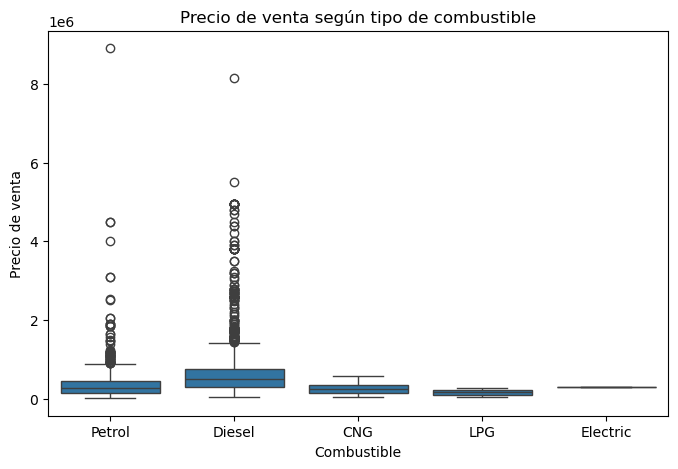

In [24]:
# Histograma de precios de venta para ver su distribución
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price'], kde=True, color='skyblue')
plt.title('Distribución de precios de venta')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de dispersión: Precio vs Año del vehículo
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['year'], y=df['selling_price'])
plt.title('Precio de venta según el año del vehículo')
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.show()

# Diagrama de dispersión: Precio vs Kilometraje
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['km_driven'], y=df['selling_price'])
plt.title('Precio de venta vs Kilómetros recorridos')
plt.xlabel('Kilómetros')
plt.ylabel('Precio de venta')
plt.show()

# Gráfico de caja: Precio por tipo de combustible
plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Precio de venta según tipo de combustible')
plt.xlabel('Combustible')
plt.ylabel('Precio de venta')
plt.show()


Para comenzar el análisis, generé histogramas y gráficos de dispersión para identificar la distribución de los precios, su relación con el año del vehículo y los kilómetros recorridos. También incluí un boxplot para observar cómo varía el precio según el tipo de combustible. Esto me permitió detectar tendencias generales, como que los autos más nuevos suelen tener precios más altos, y también posibles valores atípicos en el kilometraje o en autos con precios exageradamente altos.


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


In [26]:
# Elimino la columna 'name' porque es texto libre y no aporta al modelo
df = df.drop(columns=['name'])

# Confirmo que no hay valores faltantes en el dataset (ya lo hicimos antes, pero se incluye por claridad)
print(df.isnull().sum())

# Convierto variables categóricas a numéricas con One-Hot Encoding
# drop_first=True elimina una categoría para evitar duplicidad en la información
df = pd.get_dummies(df, drop_first=True)

# Verifico cómo quedó el dataset luego de codificar las variables categóricas
print(df.head())

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
   year  selling_price  km_driven  fuel_Diesel  fuel_Electric  fuel_LPG  \
0  2007          60000      70000        False          False     False   
1  2007         135000      50000        False          False     False   
2  2012         600000     100000         True          False     False   
3  2017         250000      46000        False          False     False   
4  2014         450000     141000         True          False     False   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0         True                    True                         False   
1         True                    True                         False   
2        False                    True                         False   
3         True                    True                         False   
4        False                    True     

En el preprocesamiento, eliminé la columna name porque no aporta valor al modelo. Confirmé que no hay valores faltantes, así que no fue necesario imputar datos. Después, transformé las variables categóricas (como fuel, transmission, owner, etc.) en variables numéricas usando One-Hot Encoding, lo que es necesario para que el modelo de regresión pueda procesarlas correctamente.


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

selling_price                   1.000000
year                            0.413922
fuel_Diesel                     0.282947
seller_type_Trustmark Dealer    0.110176
owner_Test Drive Car            0.048799
fuel_Electric                  -0.005095
fuel_LPG                       -0.042434
owner_Fourth & Above Owner     -0.078725
owner_Third Owner              -0.111326
owner_Second Owner             -0.161986
km_driven                      -0.192289
seller_type_Individual         -0.236798
fuel_Petrol                    -0.269453
transmission_Manual            -0.530205
Name: selling_price, dtype: float64


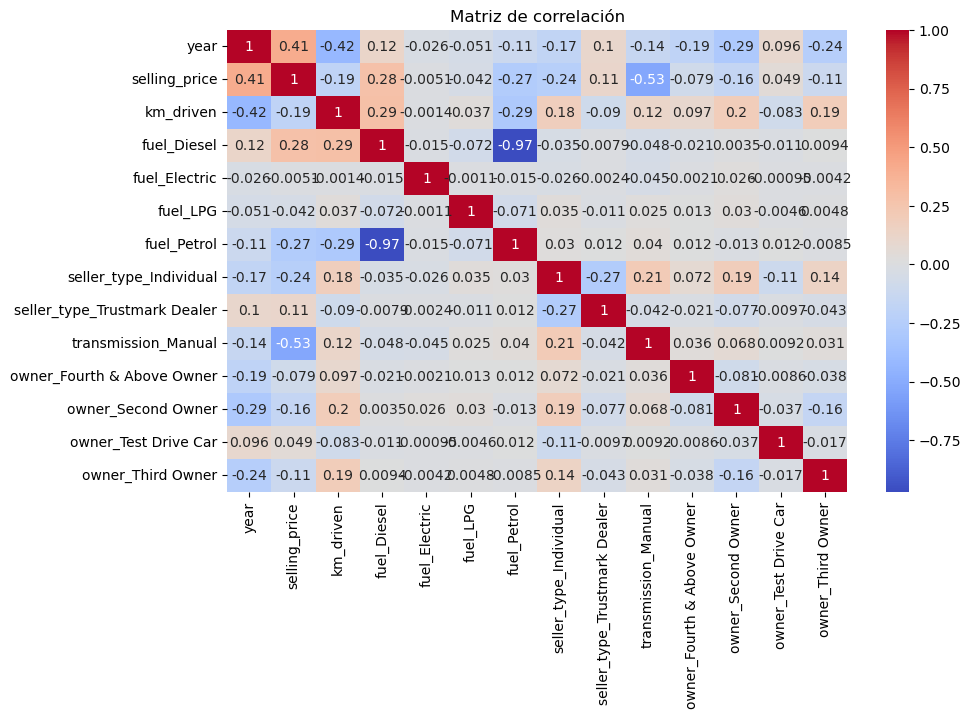

In [32]:
# Calculo la matriz de correlación
correlation = df.corr()

# Muestro la correlación de cada variable con el precio de venta
print(correlation['selling_price'].sort_values(ascending=False))

# Gráfico de mapa de calor para visualizar la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Para seleccionar las variables más relevantes, calculé la matriz de correlación y observé cuáles tienen mayor relación con el precio de venta. De esta forma identifiqué las variables que más aportan al modelo, como el año del vehículo y los kilómetros recorridos, y descarté las que no tienen influencia significativa para mejorar el rendimiento del modelo.

In [34]:
# Variable objetivo: el precio de venta
y = df['selling_price']

# Variables predictoras: todas las demás menos el precio
X = df.drop(columns=['selling_price'])

# Verifico la forma de X e y para asegurarme que estén correctas
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (4340, 13)
y shape: (4340,)


Con base en el análisis de correlación, definí como variable dependiente a selling_price, que es lo que quiero predecir, y como variables independientes todas las demás columnas resultantes del preprocesamiento. Estas serán las características que alimenten el modelo de regresión.

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

In [38]:
# Divido el conjunto de datos: 80% para entrenamiento, 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifico las dimensiones de cada parte
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3472, 13)
X_test shape: (868, 13)
y_train shape: (3472,)
y_test shape: (868,)


La división del dataset se realizó exitosamente: 3472 registros para entrenamiento y 868 para prueba, lo cual representa un 80/20 adecuado. Esto me permite evaluar el rendimiento del modelo con datos que no ha visto, garantizando una mejor validación del resultado.

5. Entrenar el modelo configurando los diferentes hiperparámetros. 

In [44]:
# Creo el modelo
modelo = LinearRegression()

# Entreno el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

Utilicé el modelo de regresión lineal de scikit-learn. Lo entrené con los datos de entrenamiento (X_train y y_train) usando el método .fit(), que es el encargado de encontrar la mejor línea que relacione las variables independientes con el precio de venta.

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

In [54]:
# Hacer predicciones con el modelo entrenado
y_pred = modelo.predict(X_test)

# Evaluar el desempeño del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("MAE (Error Absoluto Medio):", mae)
print("MSE (Error Cuadrático Medio):", mse)
print("RMSE (Raíz del MSE):", rmse)
print("R² (Coeficiente de Determinación):", r2)

MAE (Error Absoluto Medio): 221706.36930930265
MSE (Error Cuadrático Medio): 182146878750.28168
RMSE (Raíz del MSE): 426786.6899872601
R² (Coeficiente de Determinación): 0.40313036014320935


El modelo tiene un error promedio de unos 221 mil pesos (MAE), y el R² indica que logra explicar el 40.3% de la variabilidad del precio. Esto sugiere que el modelo tiene cierto poder predictivo, aunque hay espacio para mejorarlo con más ajustes o modelos más complejos.

7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

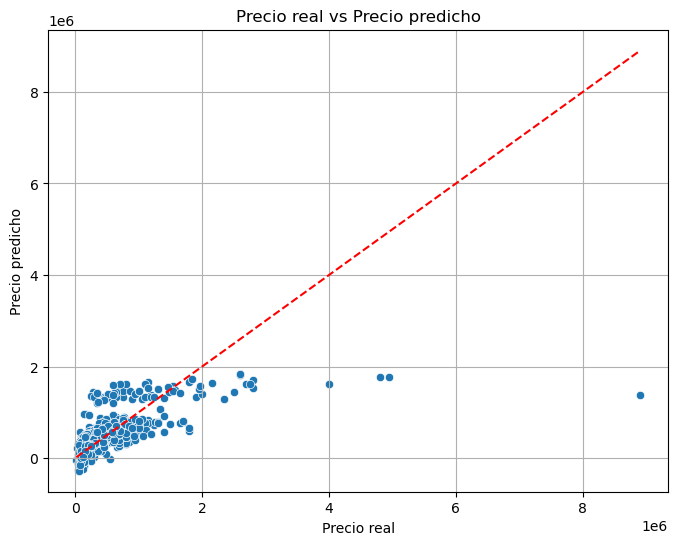

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Precio real vs Precio predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea perfecta
plt.grid(True)
plt.show()

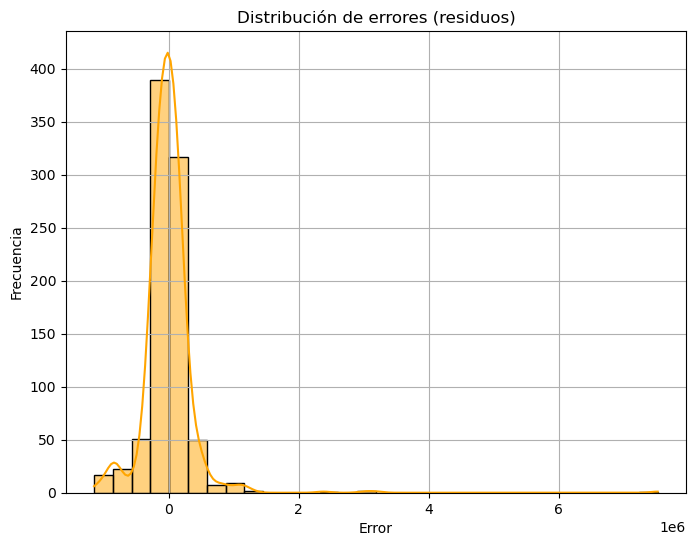

In [60]:
errores = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(errores, bins=30, kde=True, color="orange")
plt.title("Distribución de errores (residuos)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

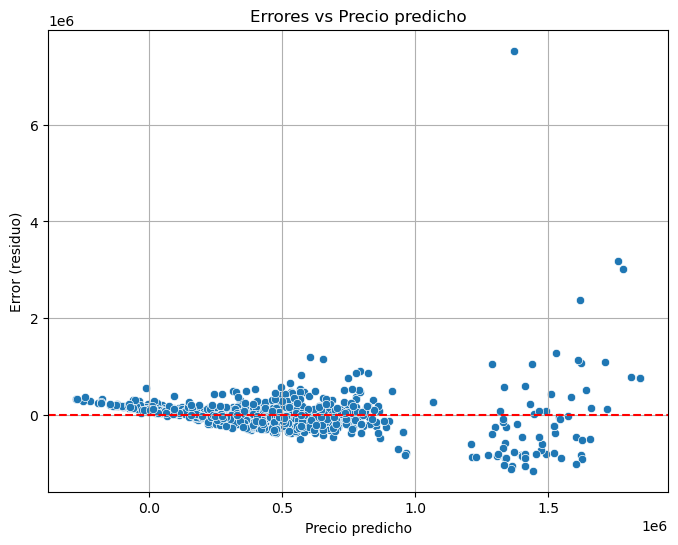

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=errores)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Precio predicho")
plt.ylabel("Error (residuo)")
plt.title("Errores vs Precio predicho")
plt.grid(True)
plt.show()

Para evaluar visualmente el rendimiento del modelo, realicé varias gráficas.

1. Primero, comparé los precios reales con los precios predichos en una gráfica de dispersión. Observé que hay una relación positiva, aunque no todas las predicciones están cerca de la línea ideal.

2. Después, analicé la distribución de los errores (residuos) con un histograma. La mayoría de los errores están cercanos a cero, lo cual es bueno, aunque hay algunos valores extremos.

3. Por último, graficando los errores contra los precios predichos, verifiqué que no haya un patrón específico en los errores, lo cual indica que el modelo no está sesgado hacia ciertos valores.

Estas visualizaciones me permitieron comprobar de forma gráfica lo que ya mostraban las métricas: que el modelo tiene un rendimiento moderado, pero todavía hay margen de mejora.
